## Heart Disease Stroke data science project
In this ML project, I have used my skills to acquire a dataset from kaggle and (https://www.kaggle.com/ronitf/heart-disease-uci/data) and I will use ML techniques 
to predict wheather the person might get a stroke or not


In [1]:
import dabl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

### Here we will be using 4 algorithms
1. K Nearest Neighbours Classifierr
2. Random Forest Classifier
3. Decision Tree Classifier
4. Logistic Regression

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
dft=pd.read_csv('heart.csv')

In [4]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dft.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Here we just did dft.describe and dft.info to find out the most basic info about the dataset such as 
the mean std and Q1, Q2, Q3, Q4 as well as the maximum and minimum values of each column along with the number of entries which is __303__ and the data type of each one of them 

In [31]:
types=dabl.detect_types(dft)
print(types)

          continuous  dirty_float  low_card_int  categorical   date  \
age            False        False          True        False  False   
sex            False        False         False         True  False   
cp             False        False         False         True  False   
trestbps        True        False         False        False  False   
chol            True        False         False        False  False   
fbs            False        False         False         True  False   
restecg        False        False         False         True  False   
thalach         True        False         False        False  False   
exang          False        False         False         True  False   
oldpeak         True        False         False        False  False   
slope          False        False         False         True  False   
ca             False        False         False         True  False   
thal           False        False         False         True  False   
target

here we have a look at the varaible types given to us to understand how much cleaning of the data we will have to do before we can make our model and lucky for us there are no dirty floats freestring or useless data rather mostly categorical data which should be an easy convert into dummy variables later

## Feature Selection

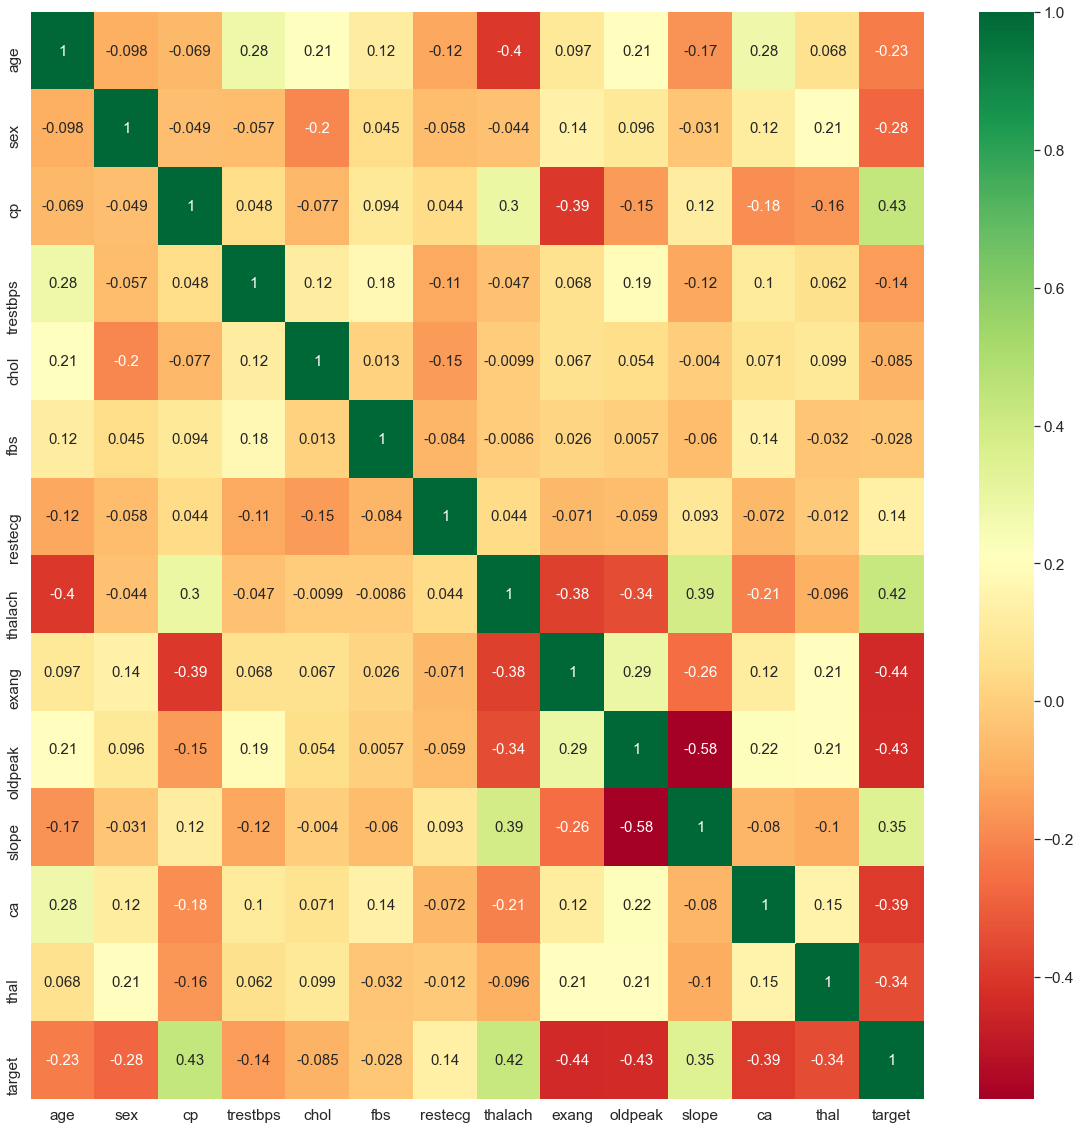

In [6]:
import seaborn as sns
corrmat=dft.corr()
sns.set(font_scale=1.4) #sets bahar ke key font in the right color box and inc their size 
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dft[top_corr_features].corr(),annot=True,cmap="RdYlGn",annot_kws={"size": 15})
#here annot and annot_kws={"size":15} sets the font size to 15 inside the heatmap

## infrences from the heat map
As we can clearly see that the target variable shows **strong correlation with chest pain and maximum heart rate achieved(Thalach)** also we can see **strong negative correlation in data in exercise induced anigma (exang) and ST depression induced by exercise relative to rest (oldpeak)**
so as negatively correlated factors __decline__ and postively correlated factors __increase__ the chances to get heart disease go up


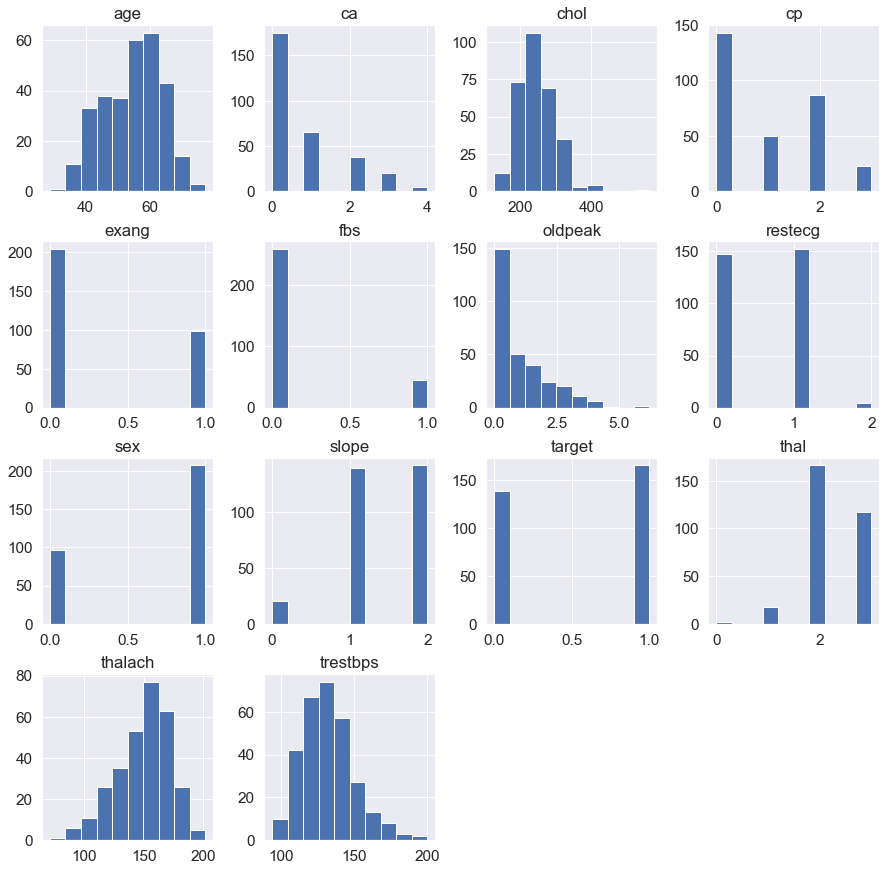

In [7]:
dft.hist(figsize=(15,15));

## Checking if the data is balanced or not

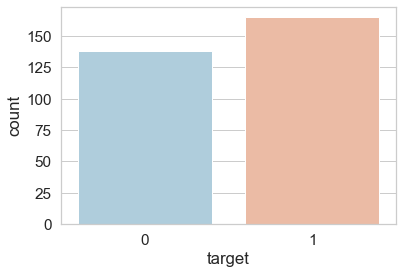

In [8]:
sns.set_style("whitegrid")
sns.countplot(x='target', data=dft, palette="RdBu_r");

### The data is almost balanced (A very good indicator)

***

## Finding the discriminating variables

Target looks like classification
Linear Discriminant Analysis training set score: 0.729


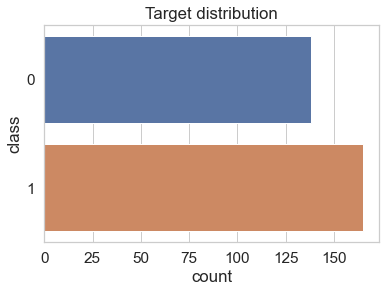

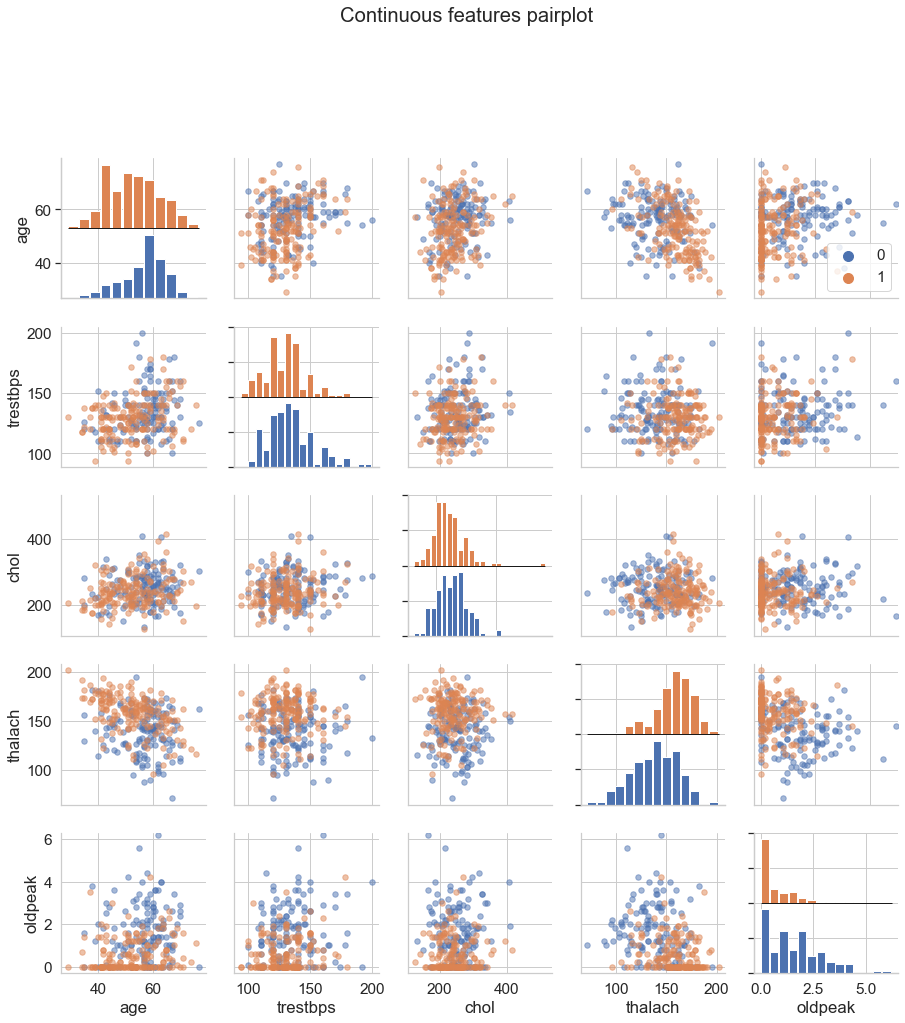

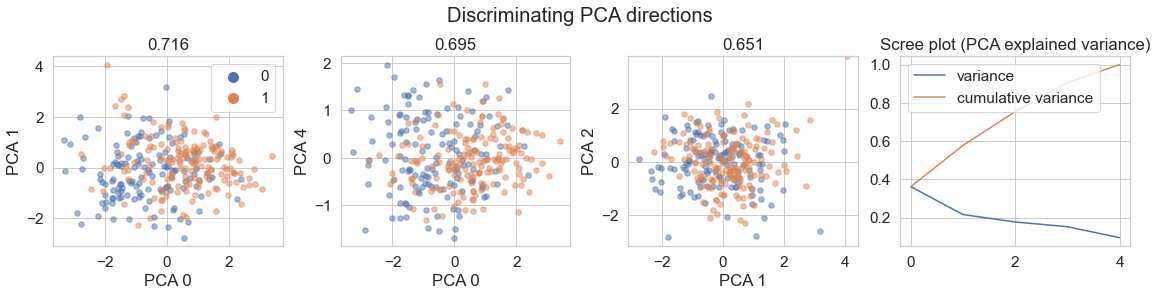

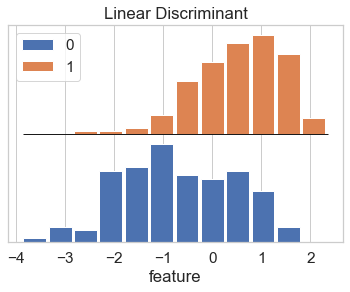

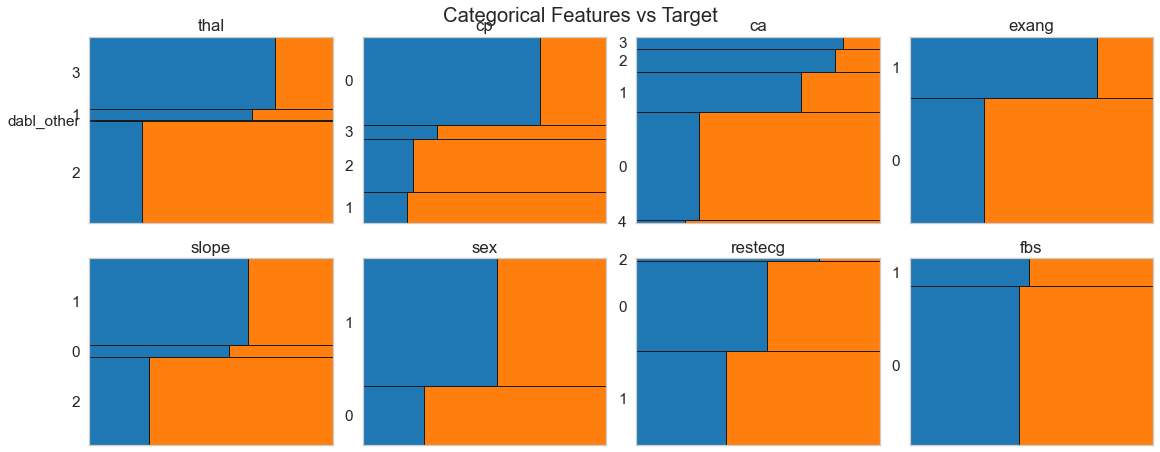

In [32]:
dabl.plot(dft,target_col='target')

## DATA PREPROCESSING


In [9]:
dft.head(n=12)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### creating dummy variables and std scaling
we looked at the the dataset and we see a lot of categorical variables that must be converted into dummy varaible to make more understandable for our ml model and also we need to scale these variables because many of the values under some column have been calculated with different set of precision making it hard to give accurate outputs of the model so we will use std scalar to make all these variable come down to a similar scale

In [10]:
dataset=pd.get_dummies(dft, columns=['sex','cp','fbs','restecg','thal','exang','slope','ca'])

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
Stdscale=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale]=Stdscale.fit_transform(dataset[columns_to_scale])

In [12]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,0,0,0,1,1,0,0,0,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,0,1,0,0,1,1,0,0,0,0


In [13]:
x=dataset.drop(['target'],axis=1)
y=dataset['target']

In [14]:

from sklearn.model_selection import cross_val_score
knn_scores=[] #first we set the k nearest neighbours as an array var
for k in range (1,21): #then for knn we do a loop for __k in range (1,no of divisions you desire of k)__ 
    knn_classifier=KNeighborsClassifier(n_neighbors=k) #now we declared a variable knn_classifier where we basicially performed the method KNeighborsClassfiers and n neighbors showing how far will the will the clusters form until which would be till the max value of k
    score=cross_val_score(knn_classifier,x,y,cv=10) #then we do cross validation 10 times to get a more accurate score of the value
    knn_scores.append(score.mean())

In [49]:
plt.rcParams["figure.figsize"] = (60,40)
plt.plot([k for k in range(1,21)],knn_scores, color='red');
for i in range(1,21):
    plt.text(i, knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of neighbors (k)');
plt.ylabel('Scores');
plt.title('K Neighbors Classifier scores for different k values');

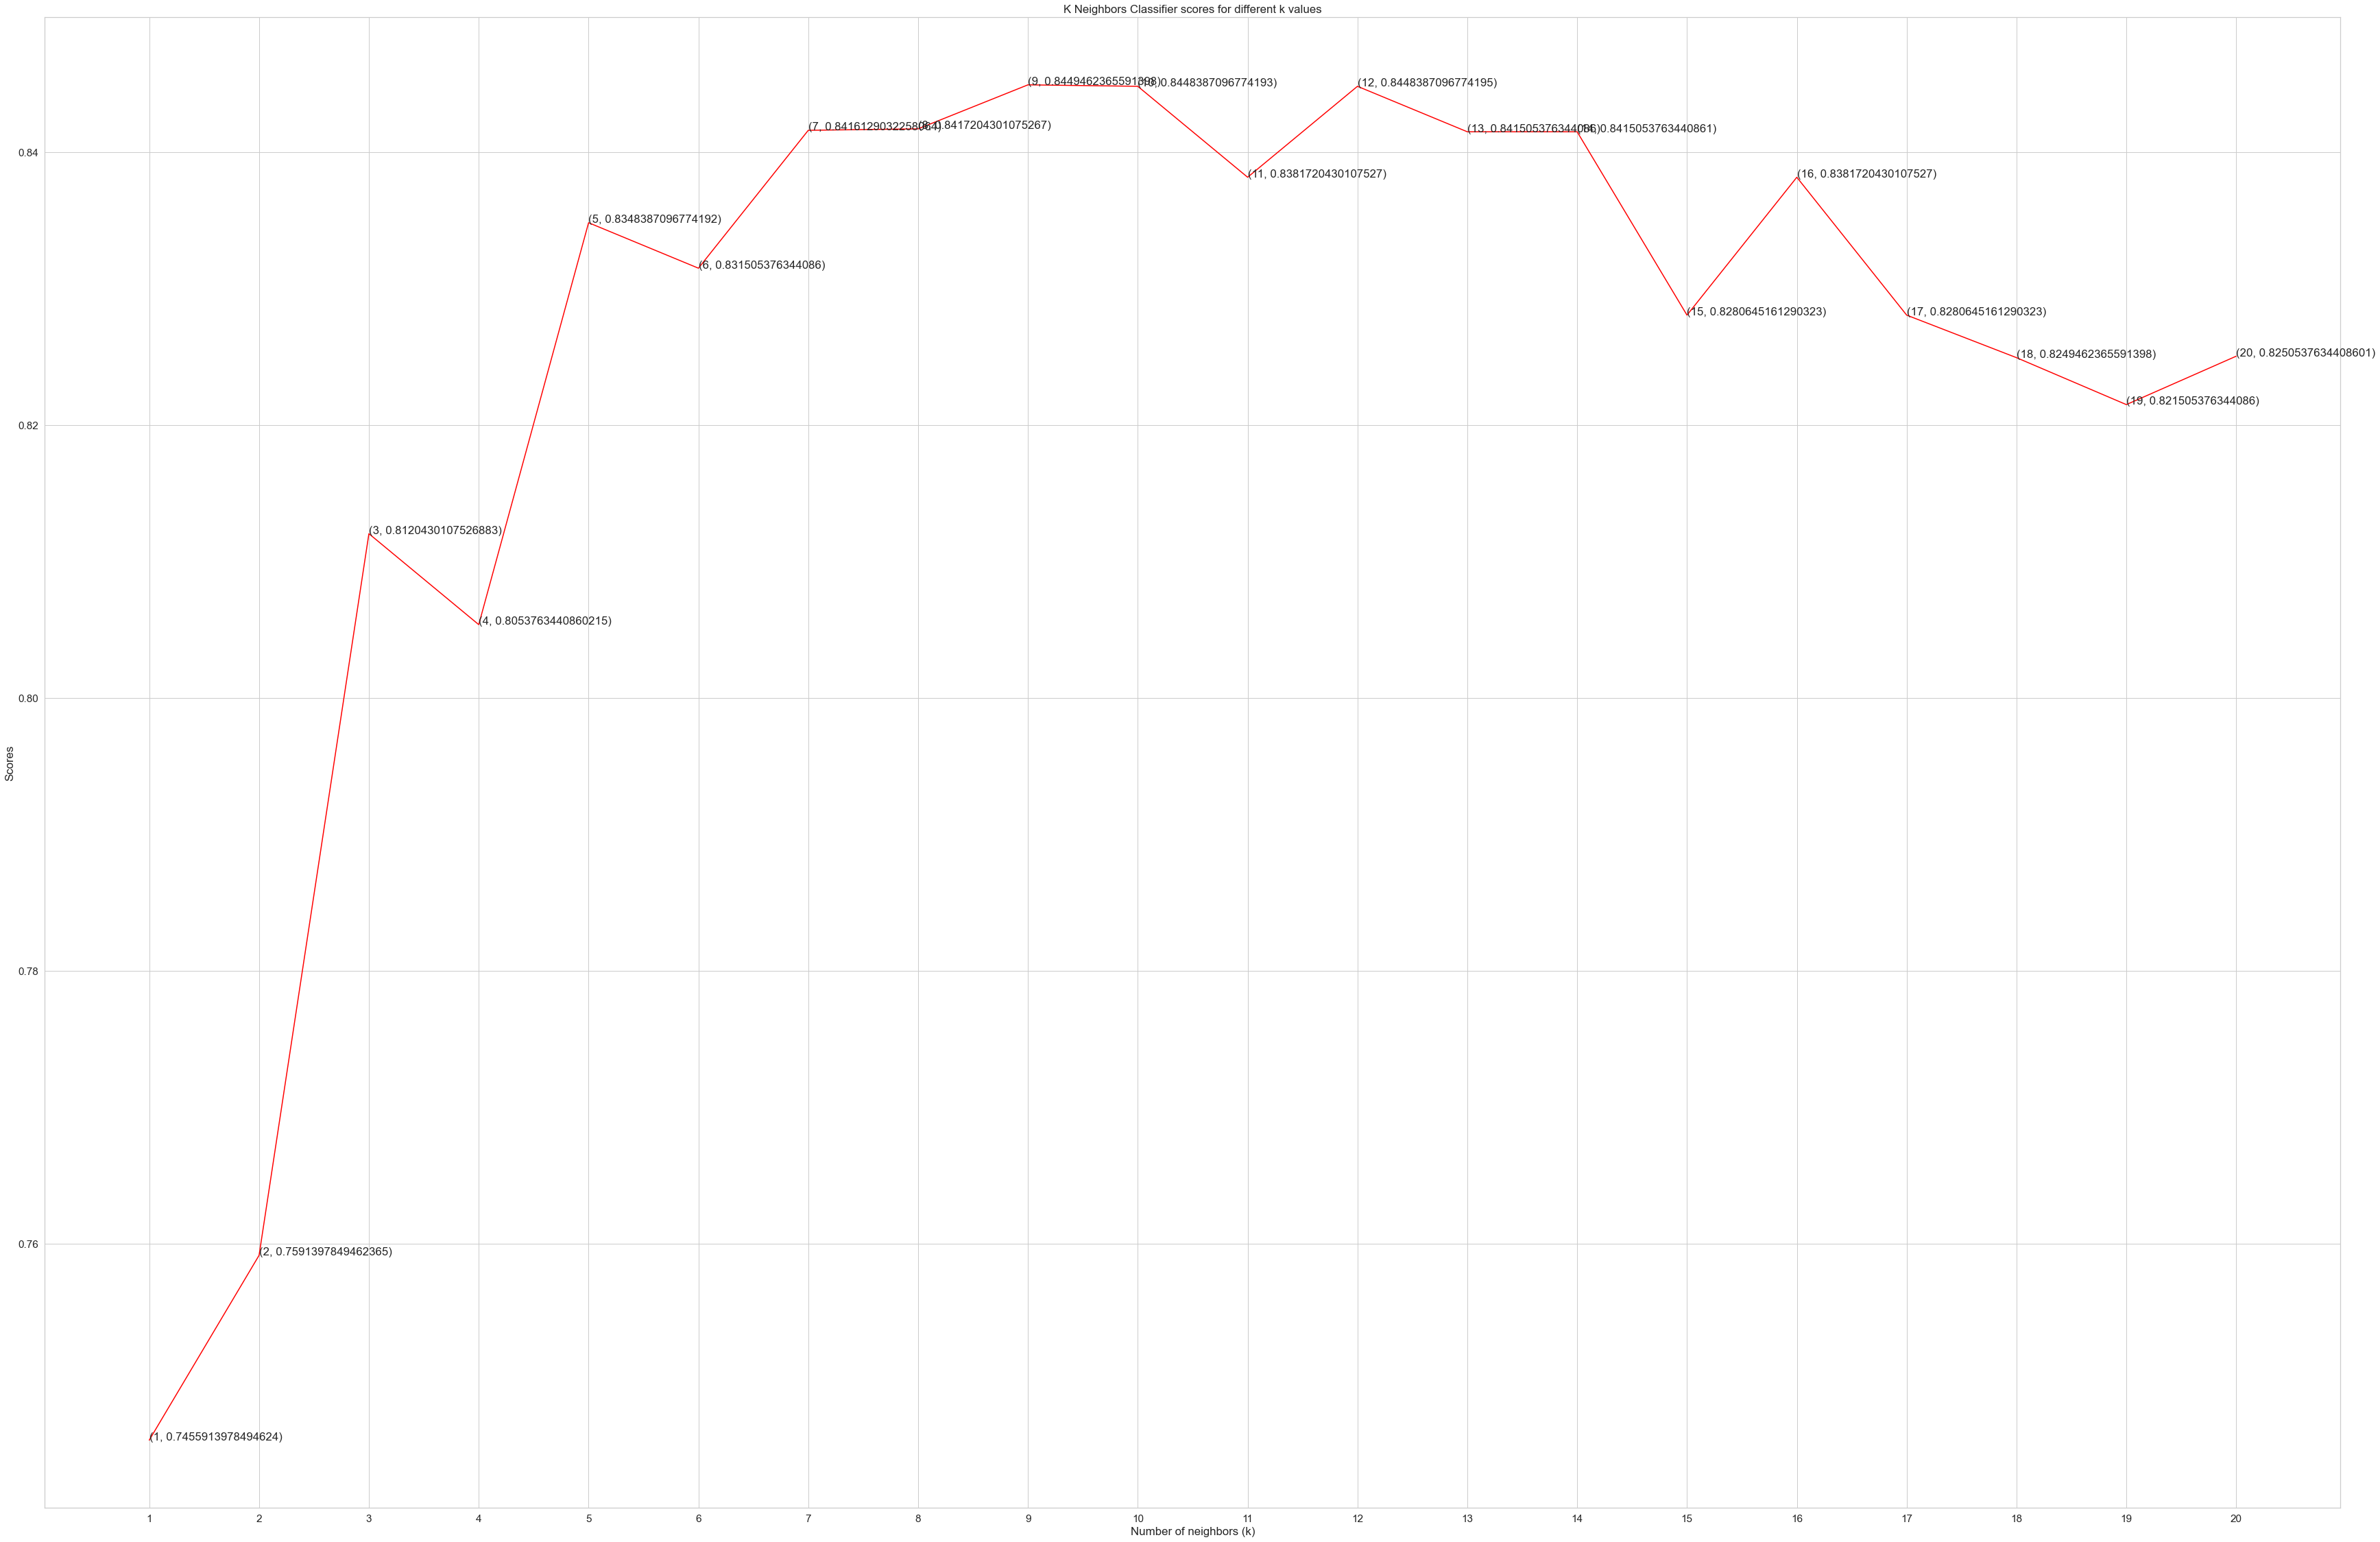

In [50]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,x,y,cv=9)

In [54]:
score.mean()

0.8380867498514557

## Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
randofor=RandomForestClassifier(n_estimators=12)
score=cross_val_score(randofor,x,y,cv=10)

In [20]:
score.mean()

0.811505376344086

## Decision Tree Classifier and Logistic Regression
I personally feel that a logistic regression would provide better accuracy for the data rather than the decision tree so we perform both using dabl

In [29]:
survivor_classifier=dabl.SimpleClassifier(random_state=0).fit(dft,target_col='target')

Running DummyClassifier(strategy='prior')
accuracy: 0.545 average_precision: 0.455 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.353
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.545 average_precision: 0.455 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.353

Running GaussianNB()
accuracy: 0.492 average_precision: 0.396 roc_auc: 0.680 recall_macro: 0.523 f1_macro: 0.437
=== new best GaussianNB() (using recall_macro):
accuracy: 0.492 average_precision: 0.396 roc_auc: 0.680 recall_macro: 0.523 f1_macro: 0.437

Running MultinomialNB()
accuracy: 0.825 average_precision: 0.299 roc_auc: 0.915 recall_macro: 0.824 f1_macro: 0.824
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.825 average_precision: 0.299 roc_auc: 0.915 recall_macro: 0.824 f1_macro: 0.824

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.693 average_precision: 0.400 roc_auc: 0.693 recall_macro: 0.693 f1_macro: 0.692
Running DecisionTreeClassifie

## END HYPOTHESIS

After analysing all the classifier and their accuracy we came to the conclusion that logistic regression was the best predictor for the heart stroke and with highst accuracy of 85.2% percent of the target data hence predicting if the patient is suffering from heart strong based on variable provided

***